## How to Fit Regression Data with NN Model in Python

In [7]:
import pandas as pd
from sklearn import datasets

In [8]:
boston = datasets.load_boston()
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.Series(boston['target'])

In [9]:
X
    # :Attribute Information (in order):
    #     - CRIM     per capita crime rate by town
    #     - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    #     - INDUS    proportion of non-retail business acres per town
    #     - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    #     - NOX      nitric oxides concentration (parts per 10 million)
    #     - RM       average number of rooms per dwelling
    #     - AGE      proportion of owner-occupied units built prior to 1940
    #     - DIS      weighted distances to five Boston employment centres
    #     - RAD      index of accessibility to radial highways
    #     - TAX      full-value property-tax rate per $10,000
    #     - PTRATIO  pupil-teacher ratio by town
    #     - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    #     - LSTAT    % lower status of the population

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [10]:
y   # MEDV     Median value of owner-occupied homes in $1000's

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

### Hyperparameter_Tuning using RandomizedSearchCV

In [35]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor # There is also a KerasClassifier class
from sklearn.model_selection import RandomizedSearchCV, KFold

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# To tune ANN hyperparameters we will need a function building/returning a model.
# This function's parameters must be our model hyperparameters that we want to tune.

#tuning:
#  - the number of hidden layers
#  - the number of neurons in each hidden layer.


def build_model(number_of_hidden_layers=3, number_of_neurons=2):
    model = Sequential()
    
    # First hidden layer
    model.add(Dense(number_of_neurons, input_shape=(13,), activation='relu'))
    
    # hidden layers
    for hidden_layer_number in range(1, number_of_hidden_layers):
        model.add(Dense(number_of_neurons, activation='relu'))
        
    # output layer
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss='mse')
    
    return model

In [13]:
tuned_model = KerasRegressor(build_fn=build_model)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


tuned_model = KerasRegressor(build_fn=build_model)

# possible values of parameters - we want to find the best set of them

params = {'number_of_hidden_layers': [2, 3, 4, 5], 'number_of_neurons': [5, 15, 25]}

# Create a randomize search cross validation object, to find the best hyperparameters it will use a KFold cross validation with 5 splits
random_search = RandomizedSearchCV(tuned_model, param_distributions = params, cv = KFold(5))


#Dataset
from tensorflow.keras.datasets import boston_housing
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20) #80% training and 20% testing

# find the best parameters!
his=random_search.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=1)

Epoch 1/200
11/11 [==============================] - 0s 14ms/step - loss: 823.1649 - val_loss: 195.5978
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 143.5387 - val_loss: 199.2804
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 134.8203 - val_loss: 143.9524
Epoch 4/200
11/11 [==============================] - 0s 4ms/step - loss: 100.2175 - val_loss: 126.6239
Epoch 5/200
11/11 [==============================] - 0s 4ms/step - loss: 85.9348 - val_loss: 97.9818
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 72.5402 - val_loss: 87.2333
Epoch 7/200
11/11 [==============================] - 0s 5ms/step - loss: 65.7425 - val_loss: 83.2636
Epoch 8/200
11/11 [==============================] - 0s 4ms/step - loss: 60.5817 - val_loss: 82.4228
Epoch 9/200
11/11 [==============================] - 0s 4ms/step - loss: 58.4851 - val_loss: 84.4232
Epoch 10/200
11/11 [==============================] - 0s 4ms/step - loss: 56.9600 

In [18]:
random_search.best_estimator_.get_params()
# best combination of hyperparameters is:
  #  'number_of_hidden_layers': 4,
  #  'number_of_neurons': 25

{'number_of_neurons': 25,
 'number_of_hidden_layers': 4,
 'build_fn': <function __main__.build_model(number_of_hidden_layers=3, number_of_neurons=2)>}

In [29]:
best_found_model = build_model(4, 25)

In [30]:
best_found_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=1)

Epoch 1/200
13/13 [==============================] - 0s 8ms/step - loss: 2912.0842 - val_loss: 956.7483
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 539.6704 - val_loss: 286.4431
Epoch 3/200
13/13 [==============================] - 0s 4ms/step - loss: 179.6971 - val_loss: 200.6961
Epoch 4/200
13/13 [==============================] - 0s 4ms/step - loss: 122.3870 - val_loss: 120.6663
Epoch 5/200
13/13 [==============================] - 0s 4ms/step - loss: 74.4059 - val_loss: 89.6117
Epoch 6/200
13/13 [==============================] - 0s 4ms/step - loss: 65.2496 - val_loss: 82.9684
Epoch 7/200
13/13 [==============================] - 0s 4ms/step - loss: 62.2081 - val_loss: 82.4884
Epoch 8/200
13/13 [==============================] - 0s 4ms/step - loss: 60.6498 - val_loss: 81.0170
Epoch 9/200
13/13 [==============================] - 0s 4ms/step - loss: 59.3923 - val_loss: 80.0848
Epoch 10/200
13/13 [==============================] - 0s 4ms/step - loss: 58.9933 

In [31]:
print(f"The best model minimum mse loss on validation set is:  { min(best_found_model.history.history['val_loss']) } ")

The best model minimum mse loss on validation set is:  16.926280975341797 


In [32]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
from pylab import rcParams

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

In [33]:
y_pred = best_found_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"The mse of Best found Saved Model is {round(mse, 2)}")

The mse of Best found Saved Model is 19.58


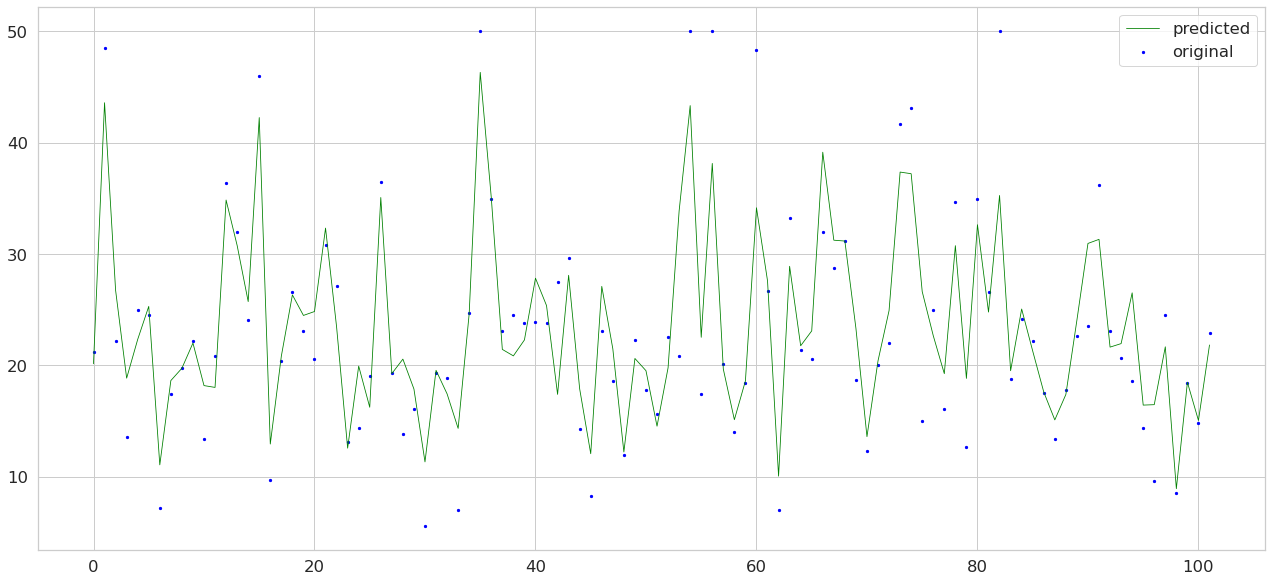

In [34]:
x_ax = range(len(y_pred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original") 
plt.plot(x_ax, y_pred, lw=0.8, color="green", label="predicted")
plt.legend()
plt.show()